In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/titanic.csv


<div style="color:white;background-color:OliveDrab;padding:3%;border-radius:150px 150px;font-size:2em;text-align:center"> <font color="White" size=+5 face="Lucida Calligraphy"><div style="align:center: justify">Titanic Survival Prediction</font></div>

<center>
    <img src="https://static.turbosquid.com/Preview/001082/332/EX/DHQ.jpg" alt="Titanic" width="100%">
</center>

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:blue"> Objectives of Notebook </h1>

<font color="OliveDrab" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">This notebook aims to:</font>

> **Dataset exploration using various types of data visualization.**

> **Build various ML models that can predict survivor of titanic passenger**

<font color="Red" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">The machine learning models used in this project are:</font>

> 1. LogisticRegression

> 2. Support Vector Machines

> 3. KNeighborsClassifier

> 4. GaussianNB

> 5. Perceptron

> 6. LinearSVC

> 7. SGDClassifier

> 8. DecisionTreeClassifier

> 9. RandomForestClassifier

> 10. MLPClassifier

> 11. XGBClassifier

> 12. ExtraTreesClassifier

> 13. AdaBoostClassifier

> 14. lgb Classifier

> 15. NuSVC

> 16. HistGradientBoostingClassifier

> 17. GaussianProcessClassifier

> 18. RidgeClassifier

> 19. CalibratedClassifierCV

> 20. PassiveAggressiveClassifier

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('precision',4)

In [4]:
#Default theme
import seaborn as sns 
sns.set_theme(context='notebook',
              style='whitegrid',
              palette='seismic',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 8]
matplotlib.rcParams.update({'font.size': 15})

In [5]:
titanic1 = pd.read_csv('../input/titanic/titanic.csv')
titanic1.head().style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,nan,S


In [6]:
print('Shape of Titanic data set is :',titanic1.shape)
print('Size of Titanic data set is  :',titanic1.size)

Shape of Titanic data set is : (891, 12)
Size of Titanic data set is  : 10692


In [7]:
print(f'This titanic dataset has {titanic1.shape[0]} instances with the {titanic1.shape[1]-1} features and 1 output variable')

This titanic dataset has 891 instances with the 11 features and 1 output variable


In [8]:
titanic1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0000,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,446.0000,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,257.3538,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,1.0000,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,223.5000,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,446.0000,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,668.5000,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,891.0000,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


In [9]:
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


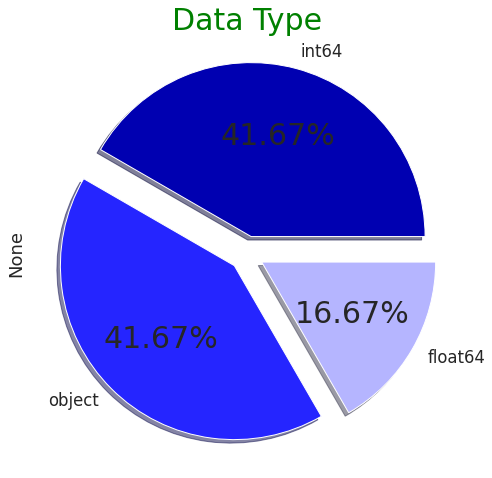

In [10]:
matplotlib.rcParams.update({'font.size': 30})

titanic1.dtypes.value_counts().plot.pie(explode=[0.1, 0.1, 0.1],
                                       autopct='%1.2f%%',
                                       shadow=True)
plt.title('Data Type',
          color='Green',
          loc='center',
          font='Times New Roman');

In [11]:
## Combining Data
titanic1.agg(
    {
        "Fare": ["min", "max", "median", "mean","skew",'std'],
        "Age": ["min", "max", "median", "mean","skew",'std'],
    }
)

,Fare,Age
min,0.0000,0.4200
max,512.3292,80.0000
median,14.4542,28.0000
mean,32.2042,29.6991
skew,4.7873,0.3891
std,49.6934,14.5265


<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:blue"> Outliers Removal </h1>

<center>
    <img src="https://miro.medium.com/max/1200/0*NMteDkhpqFhoNkEZ.png" alt="Heart Disease" width="80%">
</center>

**Outlier detection is the process of detecting outliers, or a data point that is far away from the average, and depending on what you are trying to accomplish, potentially removing or resolving them from the analysis to prevent any potential skewing. Outlier detection is one of the most important processes taken to create good, reliable data**

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution. The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summaries:

- Minimum
- First quartile
- Median
- Third quartile
- Maximum.

In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR).A segment inside the rectangle shows the median and “whiskers” above and below the box show the locations of the minimum and maximum.

<center>
<img src="https://ai-ml-analytics.com/wp-content/uploads/2020/04/outliers.png" alt="Outliers" width="80%">
</center>

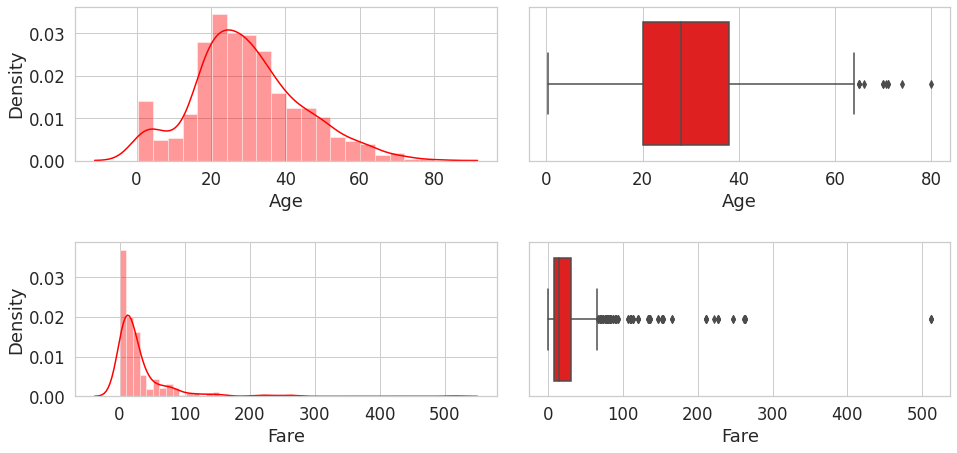

In [12]:
plt.figure(figsize=(14,7))

plt.subplot(2,2,1)
sns.distplot(titanic1['Age'],color='Red')
plt.subplot(2,2,2)
sns.boxplot(titanic1['Age'],color='Red')

plt.subplot(2,2,3)
sns.distplot(titanic1['Fare'],color='Red')
plt.subplot(2,2,4)
sns.boxplot(titanic1['Fare'],color='Red')

plt.tight_layout()
plt.show()

In [13]:
Q1 = titanic1.quantile(0.02)
Q3 = titanic1.quantile(0.98)
IQR = Q3 - Q1
IQR.sort_values(ascending=False)

PassengerId    854.40
Fare           204.94
Age             60.74
SibSp            4.00
Pclass           2.00
Parch            2.00
Survived         1.00
dtype: float64

In [14]:
titanic = titanic1 [~((titanic1 < (Q1 - 1.5 * IQR)) |(titanic1 > (Q3 + 1.5 * IQR))).any(axis=1)]

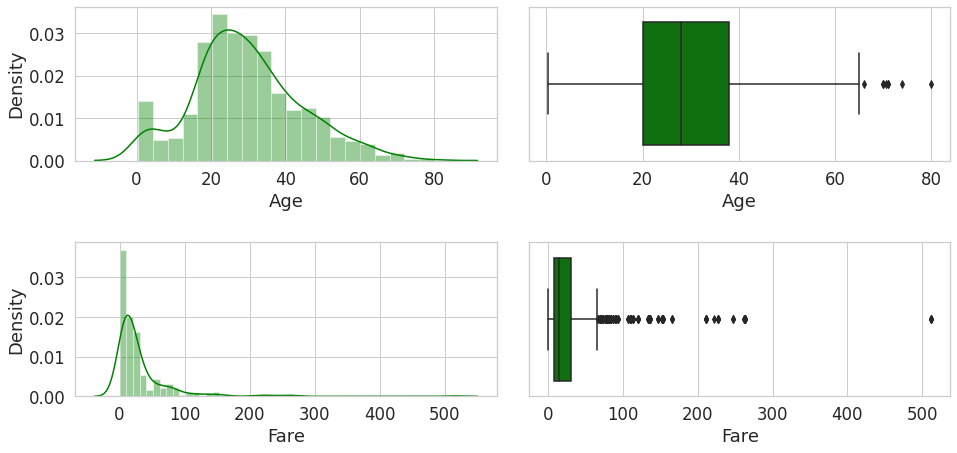

In [15]:
plt.figure(figsize=(14,7))

plt.subplot(2,2,1)
sns.distplot(titanic['Age'],color='Green')
plt.subplot(2,2,2)
sns.boxplot(titanic['Age'],color='Green')

plt.subplot(2,2,3)
sns.distplot(titanic['Fare'],color='Green')
plt.subplot(2,2,4)
sns.boxplot(titanic['Fare'],color='Green')

plt.tight_layout()
plt.show()

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:blue"> Visualization </h1>

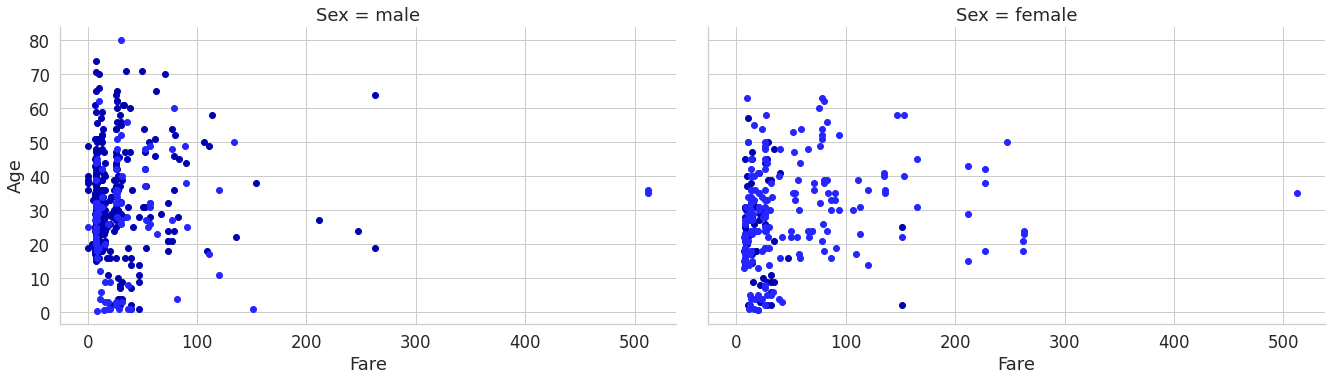

In [16]:
titanic_fig = sns.FacetGrid(titanic, col='Sex', hue='Survived',height=6,aspect=1.6)
titanic_fig.map(plt.scatter,'Fare','Age' )
plt.show()

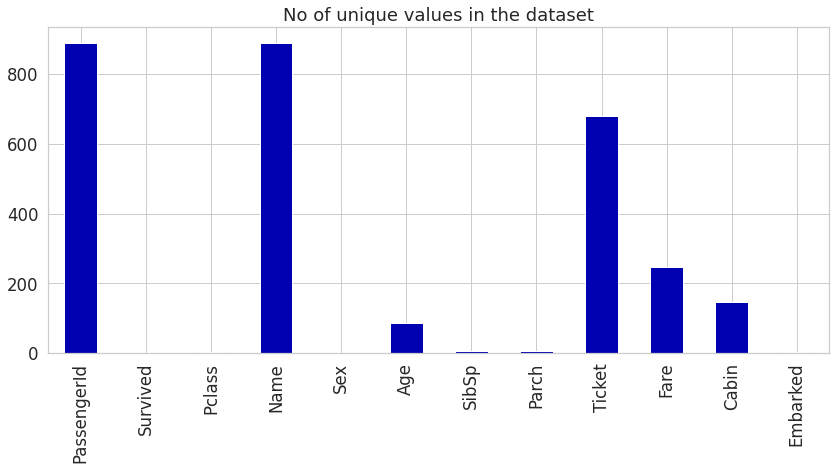

In [17]:
plt.figure(figsize=(14,6))

titanic.nunique().plot(kind='bar')
plt.title('No of unique values in the dataset')
plt.show()

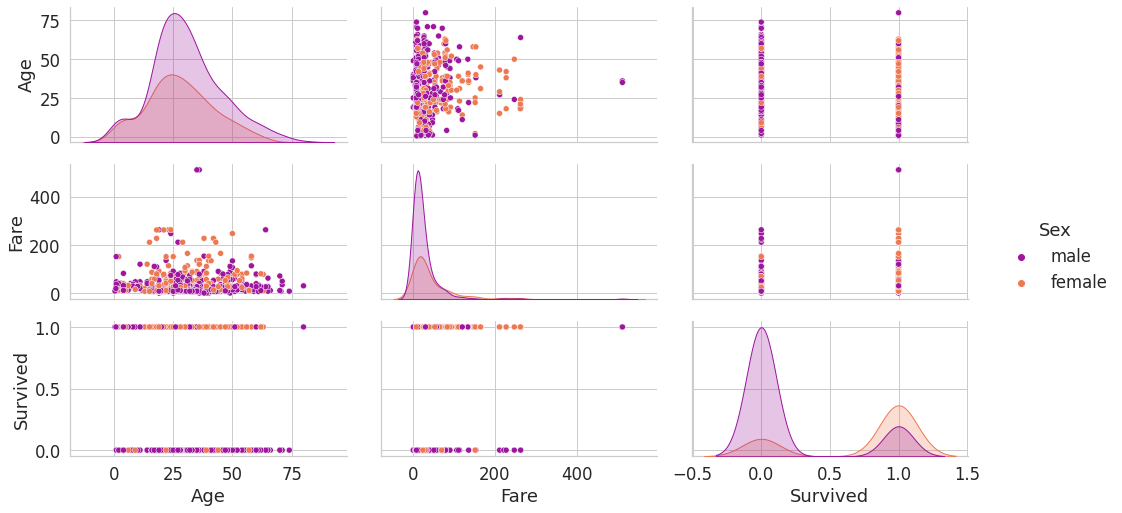

In [18]:
sns.pairplot(titanic,vars=['Age','Fare','Survived'],hue='Sex',palette='plasma',aspect=1.9);

In [19]:
numerical = titanic.select_dtypes(include=['number']).columns
categorical = titanic.select_dtypes(include=['object']).columns

print('Numerical  :',numerical)
print("**********"*10)
print("Categorical:",categorical)

Numerical  : Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
****************************************************************************************************
Categorical: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [20]:
for col in titanic[['Sex', 'Embarked','Survived','Pclass','SibSp','Parch']]:
    print(titanic[col].value_counts()) 
    print("****"*7)

male      577
female    313
Name: Sex, dtype: int64
****************************
S    643
C    168
Q     77
Name: Embarked, dtype: int64
****************************
0    548
1    342
Name: Survived, dtype: int64
****************************
3    490
1    216
2    184
Name: Pclass, dtype: int64
****************************
0    608
1    208
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
****************************
0    678
1    118
2     80
5      5
3      5
4      4
Name: Parch, dtype: int64
****************************


<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:blue"> Count and percentage plot </h1>

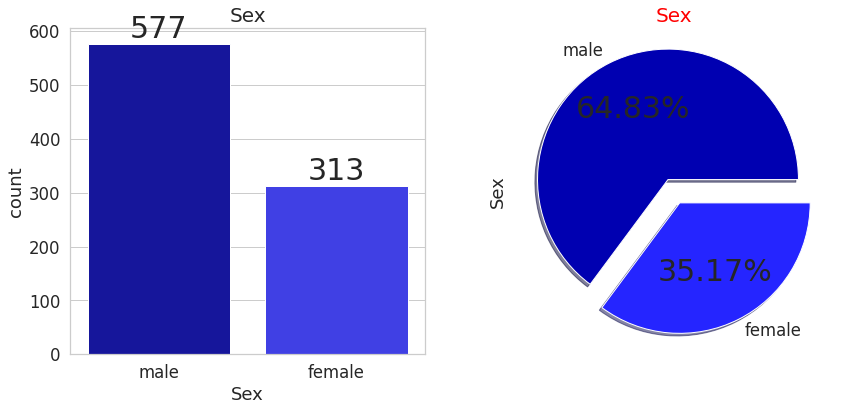

In [21]:
plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Sex', data=titanic)
ax.bar_label(ax.containers[0])
plt.title("Sex", fontsize=20)

ax =plt.subplot(1,2,2)
ax=titanic['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Sex", fontsize = 20,color='Red',font='Lucida Calligraphy');

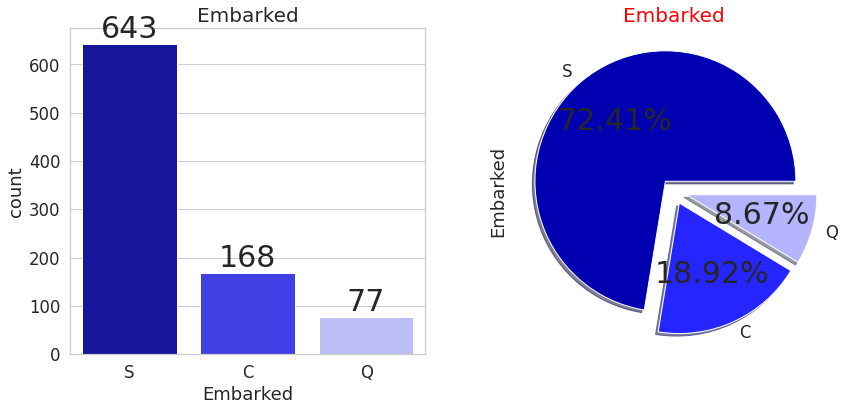

In [22]:
plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Embarked', data=titanic)
ax.bar_label(ax.containers[0])
plt.title("Embarked", fontsize=20)

ax =plt.subplot(1,2,2)
ax=titanic['Embarked'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Embarked", fontsize = 20,color='Red',font='Lucida Calligraphy');

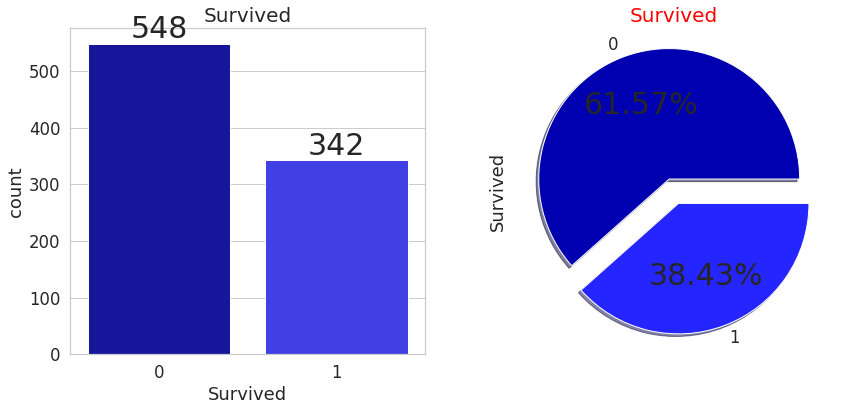

In [23]:
plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Survived', data=titanic)
ax.bar_label(ax.containers[0])
plt.title("Survived", fontsize=20)

ax =plt.subplot(1,2,2)
ax=titanic['Survived'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Survived", fontsize = 20,color='Red',font='Lucida Calligraphy');

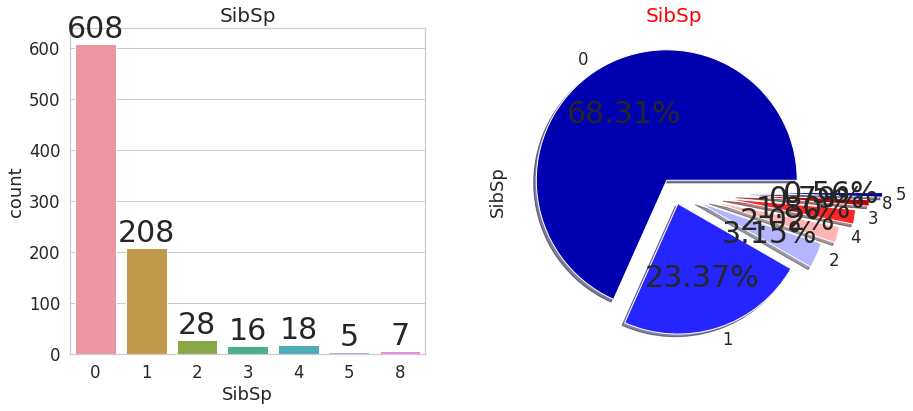

In [24]:
plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='SibSp', data=titanic)
ax.bar_label(ax.containers[0])
plt.title("SibSp", fontsize=20)

ax =plt.subplot(1,2,2)
ax=titanic['SibSp'].value_counts().plot.pie(explode=[0.1, 0.1,0.2,0.3, 0.4,0.5,0.6],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "SibSp", fontsize = 20,color='Red',font='Lucida Calligraphy');

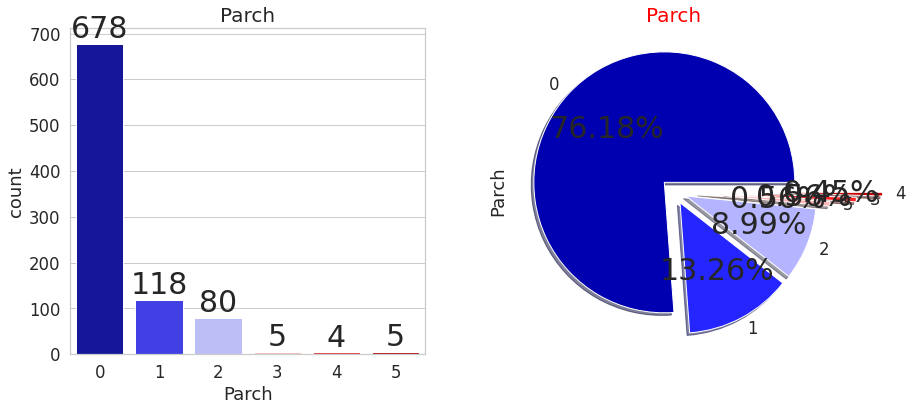

In [25]:
plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Parch', data=titanic)
ax.bar_label(ax.containers[0])
plt.title("Parch", fontsize=20)

ax =plt.subplot(1,2,2)
ax=titanic['Parch'].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.2, 0.4,0.6],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Parch", fontsize = 20,color='Red',font='Lucida Calligraphy');

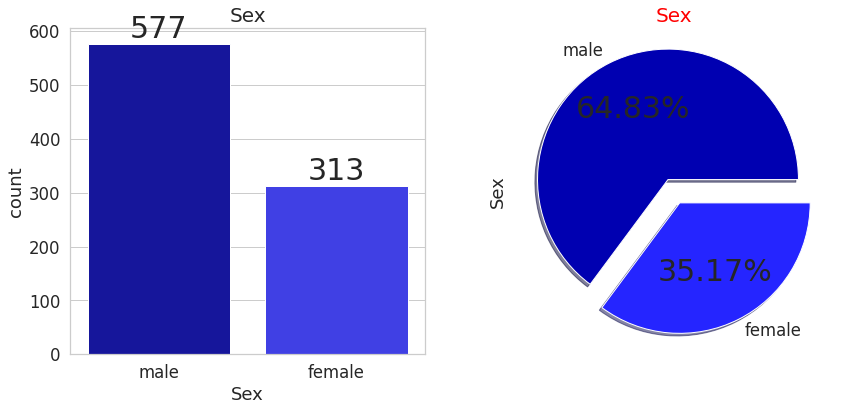

In [26]:
plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Sex', data=titanic)
ax.bar_label(ax.containers[0])
plt.title("Sex", fontsize=20)

ax =plt.subplot(1,2,2)
ax=titanic['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Sex", fontsize = 20,color='Red',font='Lucida Calligraphy');

In [27]:
pd.DataFrame(abs(titanic.corr()['Survived'])).sort_values(by='Survived',ascending=False)

,Survived
Survived,1.0000
Pclass,0.3380
Fare,0.2577
Parch,0.0903
Age,0.0762
SibSp,0.0350
PassengerId,0.0042


In [28]:
titanic.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000,-0.004,-0.036,0.036,-0.058,-0.009,0.012
Survived,-0.004,1.000,-0.338,-0.076,-0.035,0.090,0.258
Pclass,-0.036,-0.338,1.000,-0.371,0.083,0.012,-0.550
Age,0.036,-0.076,-0.371,1.000,-0.309,-0.204,0.096
SibSp,-0.058,-0.035,0.083,-0.309,1.000,0.423,0.160
Parch,-0.009,0.090,0.012,-0.204,0.423,1.000,0.220
Fare,0.012,0.258,-0.550,0.096,0.160,0.220,1.000


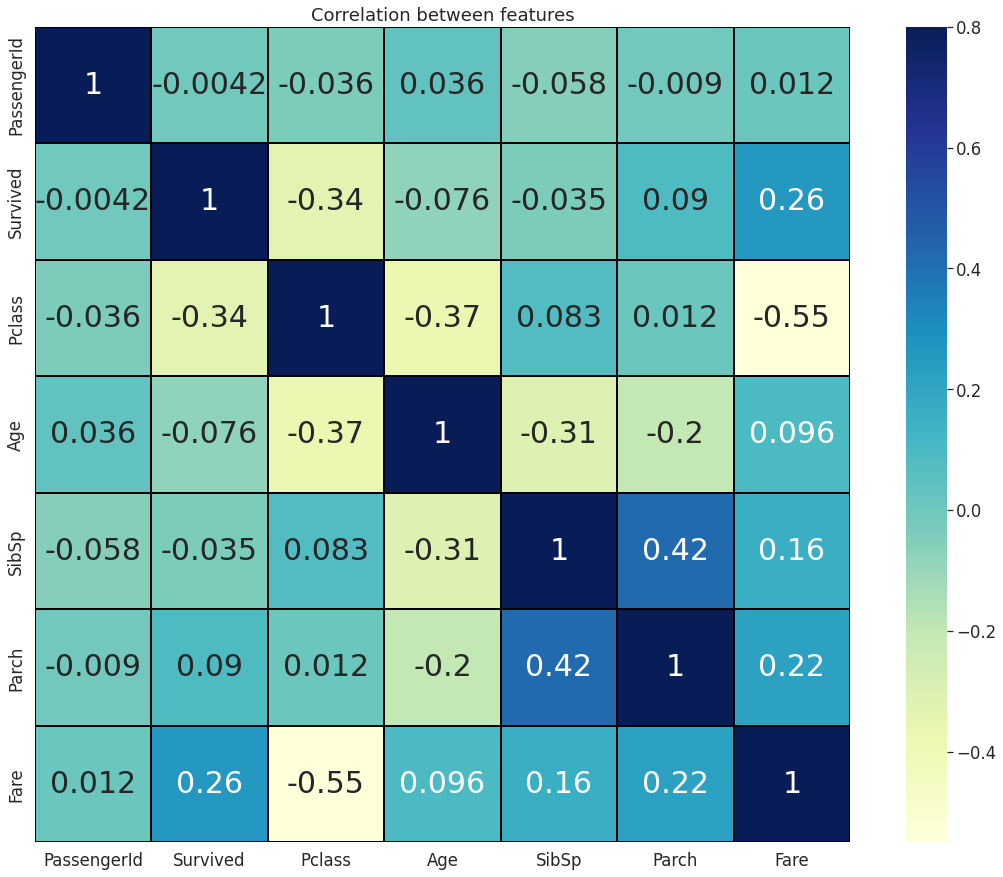

In [29]:
corr=titanic.corr()#["Survived"]
plt.figure(figsize=(20, 15))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

In [30]:
# correlation heatmap of higly correlated features with SalePrice

hig_corr = titanic.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Fare"]) >= 0.25]
hig_corr_features

Index(['Survived', 'Pclass', 'Fare'], dtype='object')

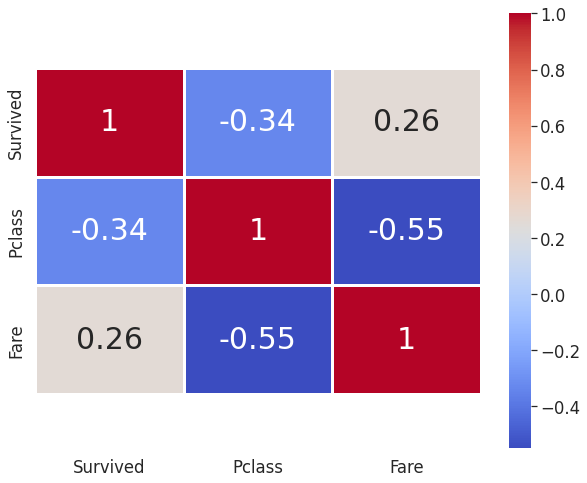

In [31]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(titanic[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)
# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue">Methods to find Missing Values </h1>

In [32]:
titanic.isnull().mean().sort_values(ascending=False)*100

Cabin          77.0787
Age            19.8876
Embarked        0.2247
PassengerId     0.0000
Survived        0.0000
Pclass          0.0000
Name            0.0000
Sex             0.0000
SibSp           0.0000
Parch           0.0000
Ticket          0.0000
Fare            0.0000
dtype: float64

In [33]:
def missing_value (df):
    missing_Number = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) !=0]
    missing_percent=round((df.isnull().sum()/df.isnull().count())*100,2)[round((df.isnull().sum()/df.isnull().count())*100,2) !=0]
    missing = pd.concat([missing_Number,missing_percent],axis=1,keys=['Missing Number','Missing Percentage'])
    return missing

In [34]:
missing_value(titanic).style.background_gradient(cmap='cool').set_precision(2)

,Missing Number,Missing Percentage
Cabin,686,77.08
Age,177,19.89
Embarked,2,0.22


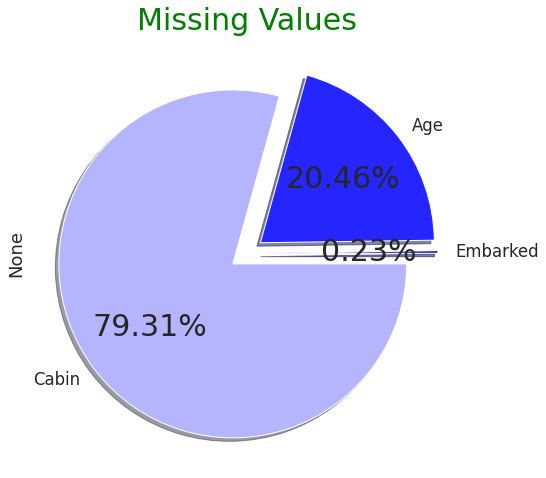

In [35]:
missing_values = titanic.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.pie(explode=[0.1, 0.1, 0.1],
                        autopct='%1.2f%%',
                        shadow=True)

plt.title('Missing Values',
          color='Green',
          loc='center',
          font='Lucida Calligraphy');

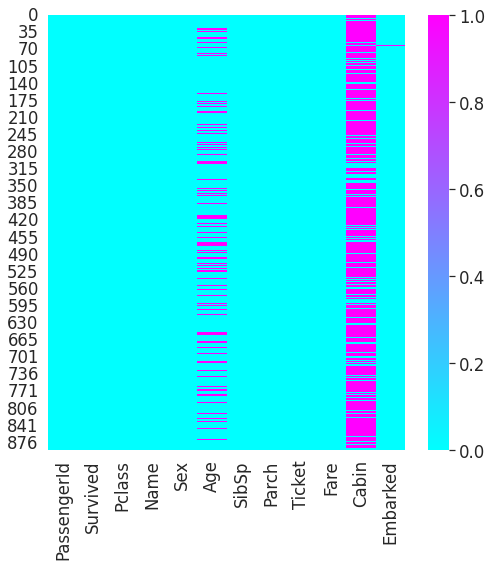

In [36]:
sns.heatmap(titanic.isnull(),cmap='cool');

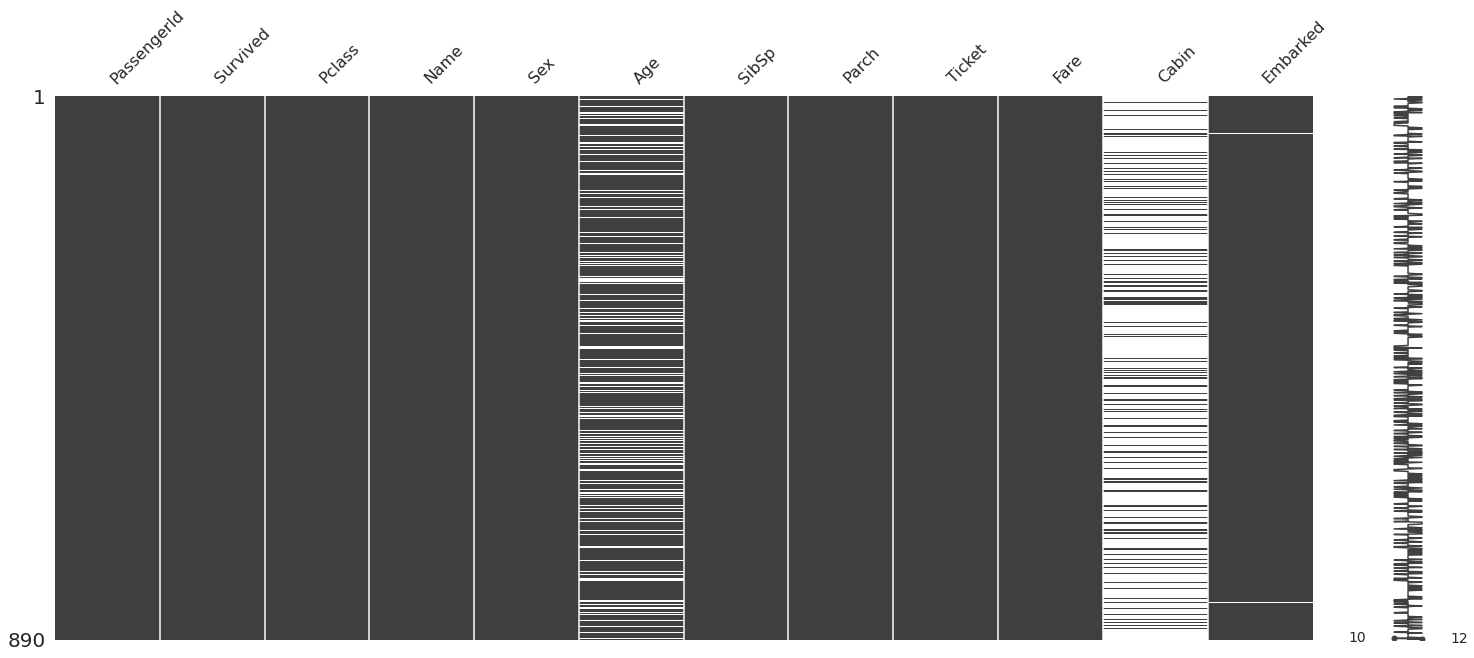

In [37]:
import missingno as msno
msno.matrix(titanic)
plt.show()

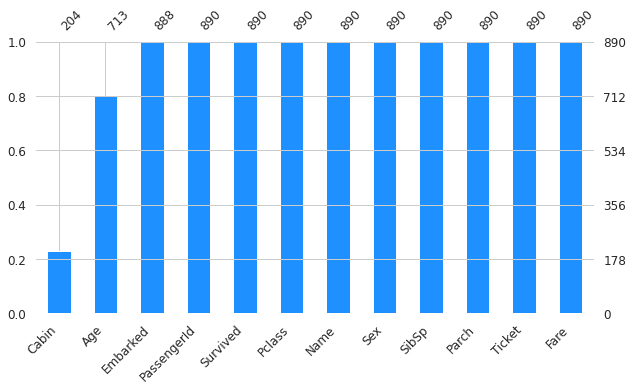

In [38]:
import missingno
missingno.bar(titanic, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:blue"> Feature Engineering </h1>
<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:OliveDrab"> Filling/Removing Missing Values </h2>

In [39]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [40]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [41]:
titanic['Embarked'] = titanic['Embarked'].fillna(method='bfill')

In [42]:
titanic = titanic.drop(['Cabin'],axis=1)

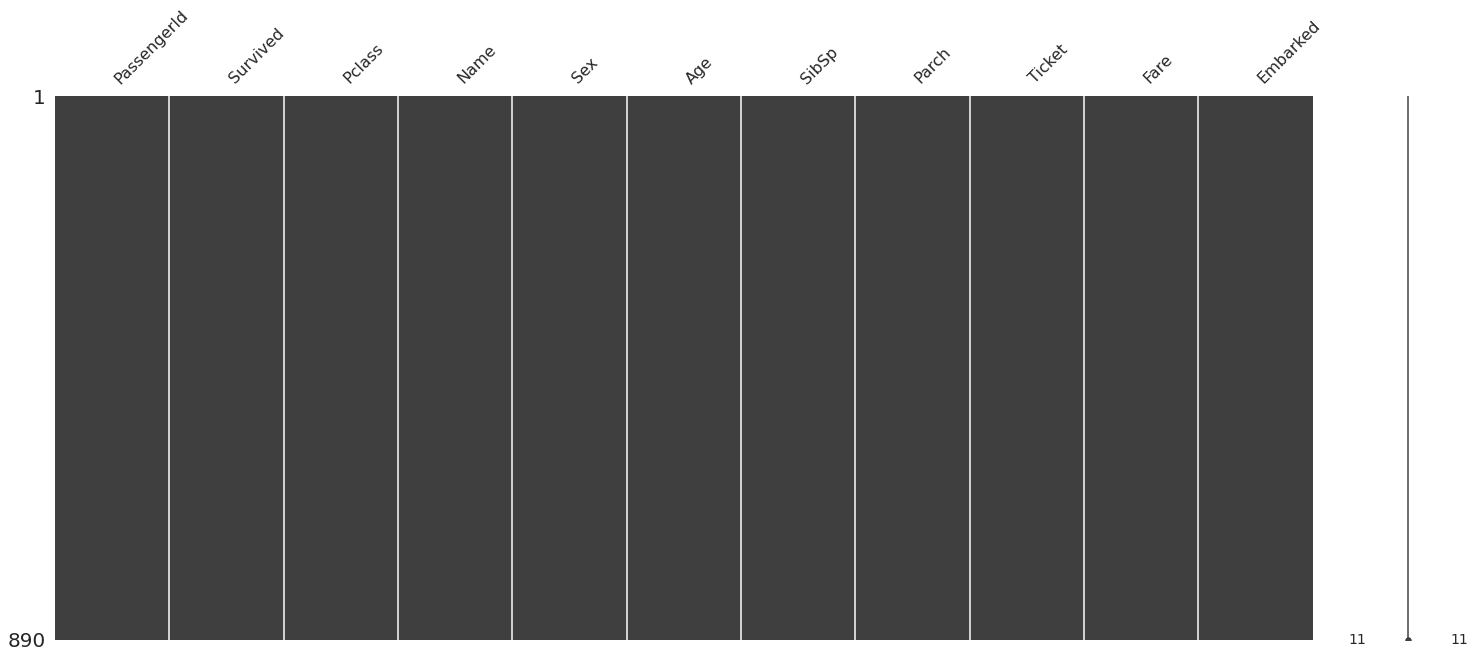

In [43]:
import missingno as msno
msno.matrix(titanic)
plt.show()

<font color="Green" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">All the Missing Value is Filled/Removed</font>

In [44]:
titanic = titanic.drop(['Name','Ticket'],axis=1)

In [45]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


<font color="Indigo" size=+1.5 face="Lucida Calligraphy"><div style="text-align: justify">Categorical feature (Sex & Embarked) is converted into numerical feature by using pandas dummy method</font>

In [46]:
titanic = pd.get_dummies(titanic,columns=['Sex','Embarked'],drop_first=True)
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> Train Test Split </h2>

In [47]:
X = titanic.drop(['Survived'],axis=1) 
y = titanic['Survived']

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> Standardizing the data</h2>

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [50]:
display(X_train.head())
display(X_test.head())

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.9517,1.0,0.4327,0.000,0.0,0.0154,1.0,0.0,0.0
1,0.9079,0.5,0.4832,0.000,0.0,0.0254,1.0,0.0,1.0
2,0.0258,0.0,0.3445,0.000,0.0,0.0693,1.0,0.0,1.0
3,0.1090,0.0,0.2815,0.000,0.2,0.1237,1.0,0.0,0.0
4,0.0101,0.5,0.1680,0.125,0.0,0.0587,0.0,0.0,0.0


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.6921,1.0,0.4201,0.125,0.2,0.0281,1.0,0.0,1.0
1,0.4258,1.0,0.2311,0.000,0.0,0.0152,1.0,0.0,1.0
2,0.8146,1.0,0.2437,0.000,0.0,0.0169,1.0,0.0,1.0
3,0.8506,0.5,0.2185,0.000,0.0,0.0224,1.0,0.0,1.0
4,0.5056,0.5,0.4454,0.125,0.4,0.0542,1.0,0.0,1.0


<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:40px; color:Blue">Model Implementation</h1>

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> LogisticRegression</h2>

Training Accuracy    : 80.06 %
Model Accuracy Score : 80.9 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       106
           1       0.81      0.69      0.75        72

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178

--------------------------------------------------------


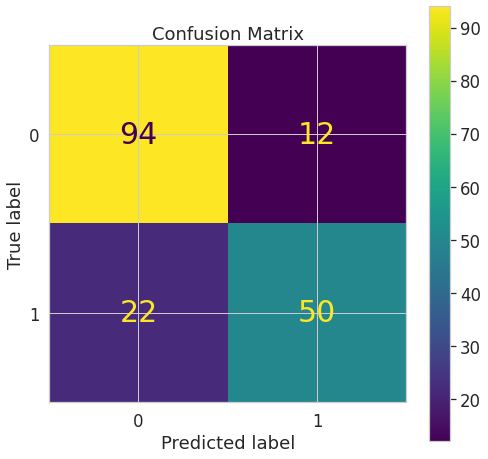

In [51]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(logreg, X_test, y_test);
plt.title('Confusion Matrix');

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> Support Vector Machines</h2>

Training Accuracy    : 81.46 %
Model Accuracy Score : 80.34 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.76      0.97      0.85       106
           1       0.93      0.56      0.70        72

    accuracy                           0.80       178
   macro avg       0.85      0.76      0.78       178
weighted avg       0.83      0.80      0.79       178

--------------------------------------------------------


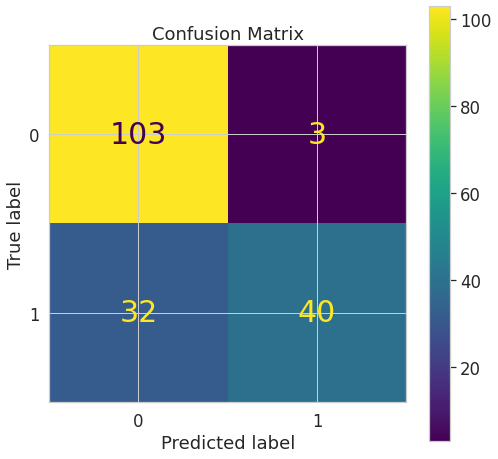

In [52]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(svc, X_test, y_test);
plt.title('Confusion Matrix');

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> KNeighborsClassifier</h2>

Training Accuracy    : 88.06 %
Model Accuracy Score : 76.97 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       106
           1       0.73      0.68      0.71        72

    accuracy                           0.77       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178

--------------------------------------------------------


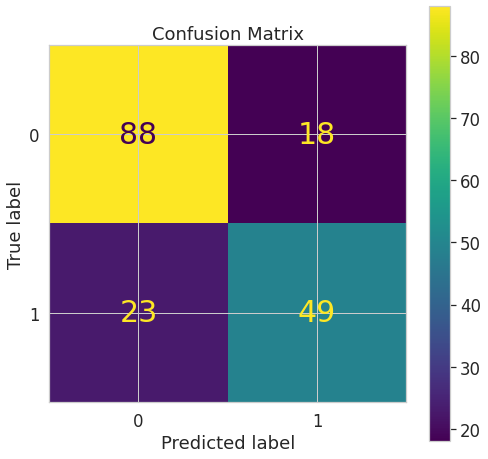

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy    :",knn_train ,"%")
print("Model Accuracy Score :",knn_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(knn, X_test, y_test);
plt.title('Confusion Matrix');

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> GaussianNB</h2>

Training Accuracy    : 78.51 %
Model Accuracy Score : 82.02 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       106
           1       0.83      0.69      0.76        72

    accuracy                           0.82       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.82      0.82      0.82       178

--------------------------------------------------------


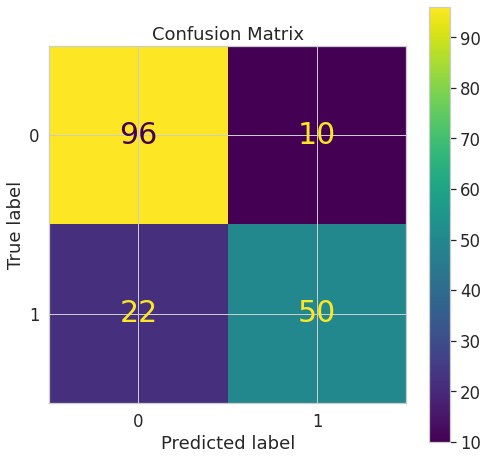

In [54]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred_gaussian = gaussian.predict(X_test)

gaussian_train = round(gaussian.score(X_train, y_train) * 100, 2)
gaussian_accuracy = round(accuracy_score(y_pred_gaussian, y_test) * 100, 2)

print("Training Accuracy    :",gaussian_train ,"%")
print("Model Accuracy Score :",gaussian_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_gaussian))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(gaussian, X_test, y_test);
plt.title('Confusion Matrix');

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> Perceptron</h2>

Training Accuracy    : 78.37 %
Model Accuracy Score : 79.78 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.79      0.91      0.84       106
           1       0.82      0.64      0.72        72

    accuracy                           0.80       178
   macro avg       0.80      0.77      0.78       178
weighted avg       0.80      0.80      0.79       178

--------------------------------------------------------


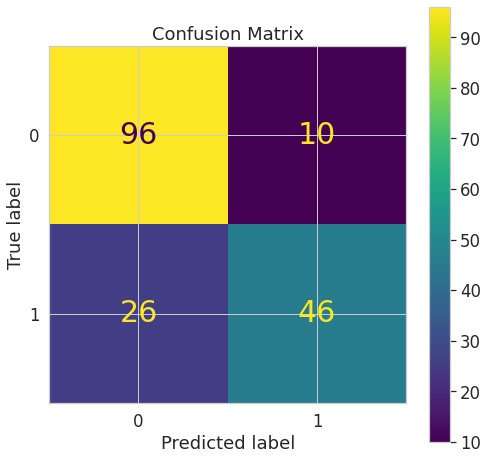

In [55]:
# Perceptron

from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)


perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)
perceptron_accuracy = round(accuracy_score(y_pred_perceptron, y_test) * 100, 2)

print("Training Accuracy    :",perceptron_train ,"%")
print("Model Accuracy Score :",perceptron_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_perceptron))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(perceptron, X_test, y_test);
plt.title('Confusion Matrix');

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> LinearSVC </h2>

Training Accuracy    : 80.06 %
Model Accuracy Score : 80.9 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       106
           1       0.81      0.69      0.75        72

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178

--------------------------------------------------------


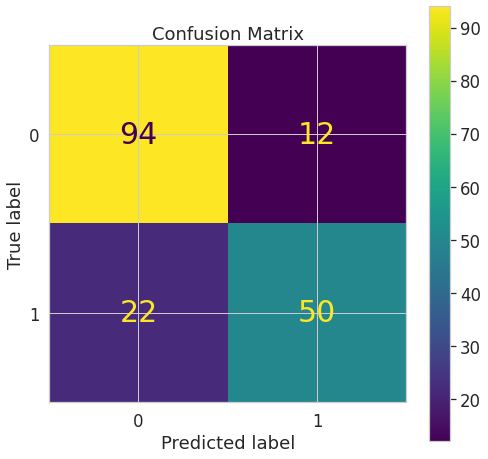

In [56]:
# Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred_linearsvc = linear_svc.predict(X_test)

linear_svc_train = round(linear_svc.score(X_train, y_train) * 100, 2)
linear_svc_accuracy = round(accuracy_score(y_pred_linearsvc, y_test) * 100, 2)

print("Training Accuracy    :",linear_svc_train ,"%")
print("Model Accuracy Score :",linear_svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_linearsvc))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(linear_svc, X_test, y_test);
plt.title('Confusion Matrix');

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> SGDClassifier</h2>

Training Accuracy    : 73.17 %
Model Accuracy Score : 75.28 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.86      0.70      0.77       106
           1       0.65      0.83      0.73        72

    accuracy                           0.75       178
   macro avg       0.76      0.77      0.75       178
weighted avg       0.78      0.75      0.76       178

--------------------------------------------------------


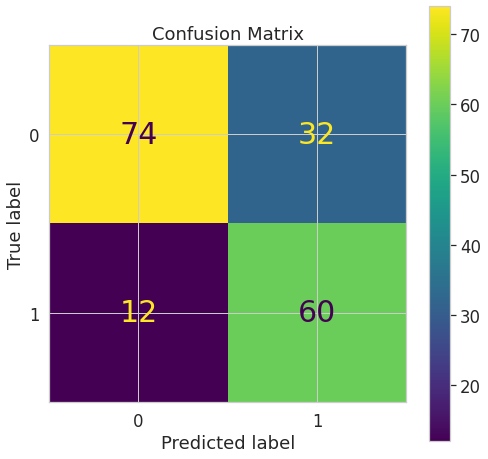

In [57]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

sgd_train = round(sgd.score(X_train, y_train) * 100, 2)
sgd_accuracy = round(accuracy_score(y_pred_sgd, y_test) * 100, 2)

print("Training Accuracy    :",sgd_train ,"%")
print("Model Accuracy Score :",sgd_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_sgd))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(sgd, X_test, y_test);
plt.title('Confusion Matrix');

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> DecisionTreeClassifier</h2>

Training Accuracy    : 100.0 %
Model Accuracy Score : 73.6 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.78      0.77      0.78       106
           1       0.67      0.68      0.68        72

    accuracy                           0.74       178
   macro avg       0.73      0.73      0.73       178
weighted avg       0.74      0.74      0.74       178

--------------------------------------------------------


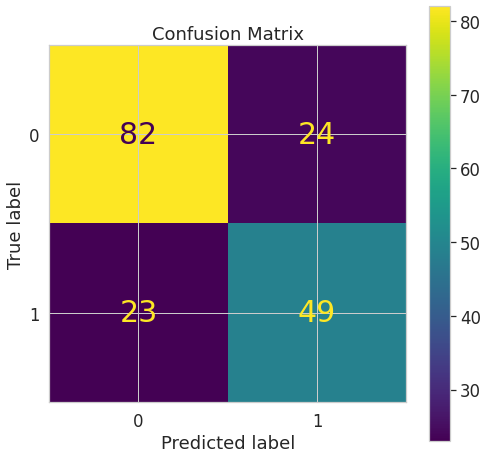

In [58]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(decision, X_test, y_test);
plt.title('Confusion Matrix');

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> RandomForestClassifier</h2>

Training Accuracy    : 100.0 %
Model Accuracy Score : 81.46 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       106
           1       0.82      0.69      0.75        72

    accuracy                           0.81       178
   macro avg       0.82      0.80      0.80       178
weighted avg       0.82      0.81      0.81       178

--------------------------------------------------------


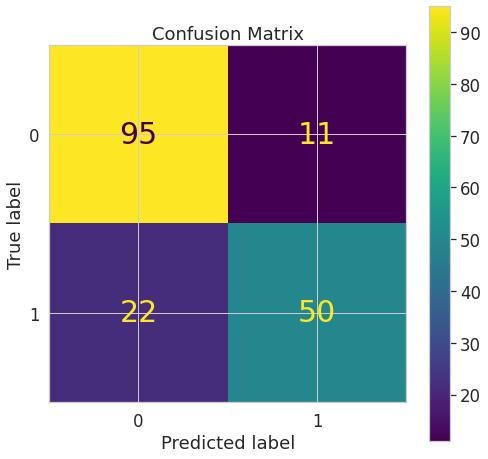

In [59]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(random_forest, X_test, y_test);
plt.title('Confusion Matrix');

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> MLPClassifier</h2>

Training Accuracy    : 83.15 %
Model Accuracy Score : 82.02 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.79      0.94      0.86       106
           1       0.88      0.64      0.74        72

    accuracy                           0.82       178
   macro avg       0.84      0.79      0.80       178
weighted avg       0.83      0.82      0.81       178

--------------------------------------------------------


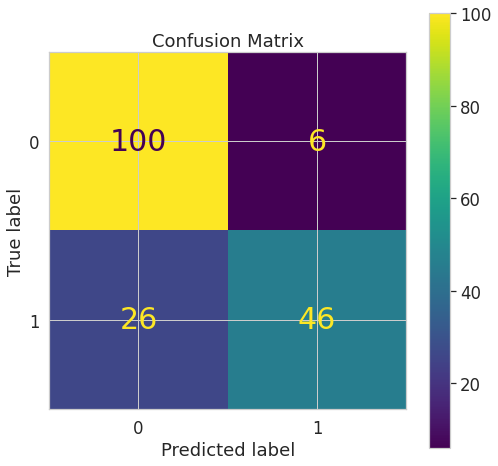

In [60]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)
mlp.score(X_train, y_train)


mlp_train = round(mlp.score(X_train, y_train) * 100, 2)
mlp_accuracy = round(accuracy_score(y_pred_mlp, y_test) * 100, 2)

print("Training Accuracy    :",mlp_train ,"%")
print("Model Accuracy Score :",mlp_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_mlp))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(mlp, X_test, y_test);
plt.title('Confusion Matrix');

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> XGBClassifier</h2>

Training Accuracy    : 100.0 %
Model Accuracy Score : 80.34 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       106
           1       0.78      0.71      0.74        72

    accuracy                           0.80       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178

--------------------------------------------------------


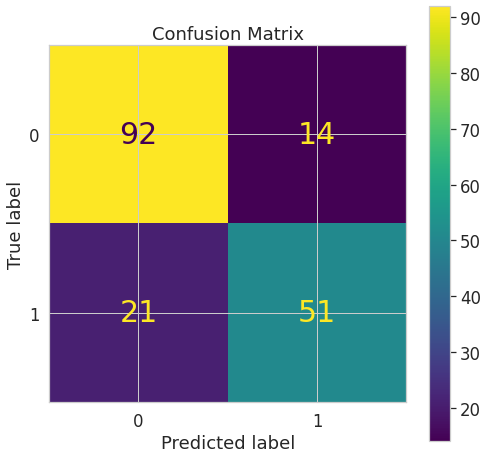

In [61]:
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

print("Training Accuracy    :",xgb_train ,"%")
print("Model Accuracy Score :",xgb_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(xgb, X_test, y_test);
plt.title('Confusion Matrix');

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> ExtraTreesClassifier</h2>

Training Accuracy    : 100.0 %
Model Accuracy Score : 80.9 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       106
           1       0.81      0.69      0.75        72

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178

--------------------------------------------------------


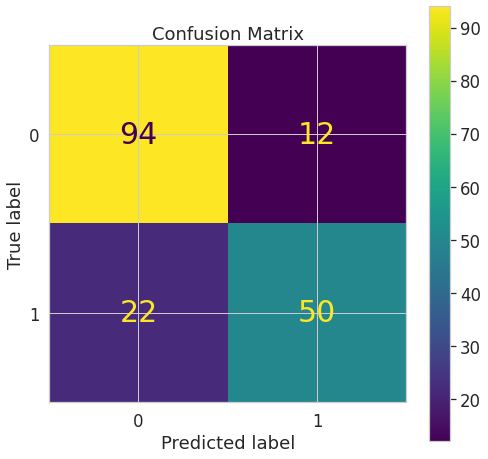

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators= 100)
et.fit(X_train,y_train)
y_pred_et = et.predict(X_test)

et_train = round(et.score(X_train, y_train) * 100, 2)
et_accuracy = round(accuracy_score(y_pred_et, y_test) * 100, 2)

print("Training Accuracy    :",et_train ,"%")
print("Model Accuracy Score :",et_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_et))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(et, X_test, y_test);
plt.title('Confusion Matrix');

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> AdaBoostClassifier</h2>

Training Accuracy    : 84.69 %
Model Accuracy Score : 80.9 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       106
           1       0.81      0.69      0.75        72

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178

--------------------------------------------------------


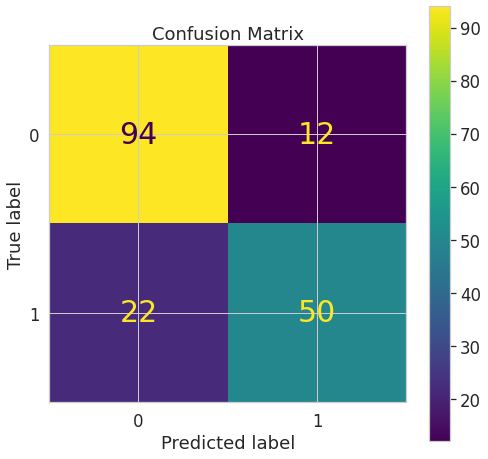

In [63]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

ada_train = round(ada.score(X_train, y_train) * 100, 2)
ada_accuracy = round(accuracy_score(y_pred_ada, y_test) * 100, 2)

print("Training Accuracy    :",ada_train ,"%")
print("Model Accuracy Score :",ada_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_ada))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(ada, X_test, y_test);
plt.title('Confusion Matrix');

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> lgb Classifier</h2>

Training Accuracy    : 100.0 %
Model Accuracy Score : 80.9 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       106
           1       0.80      0.71      0.75        72

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178

--------------------------------------------------------


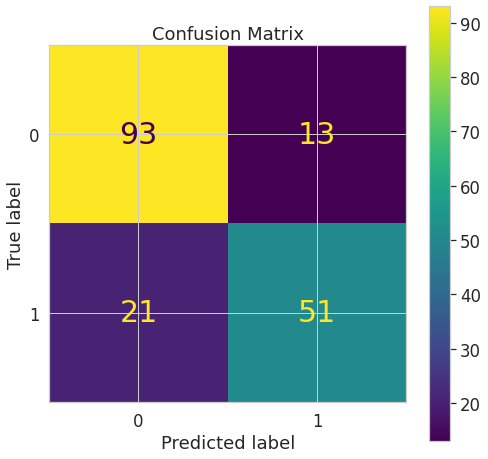

In [64]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier()
lgb.fit(X_train,y_train)
y_pred_lgb = lgb.predict(X_test)

lgb_train = round(lgb.score(X_train, y_train) * 100, 2)
lgb_accuracy = round(accuracy_score(y_pred_lgb, y_test) * 100, 2)

print("Training Accuracy    :",lgb_train ,"%")
print("Model Accuracy Score :",lgb_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lgb))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(lgb, X_test, y_test);
plt.title('Confusion Matrix');

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> NuSVC </h2>

Training Accuracy    : 79.78 %
Model Accuracy Score : 79.78 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.79      0.91      0.84       106
           1       0.82      0.64      0.72        72

    accuracy                           0.80       178
   macro avg       0.80      0.77      0.78       178
weighted avg       0.80      0.80      0.79       178

--------------------------------------------------------


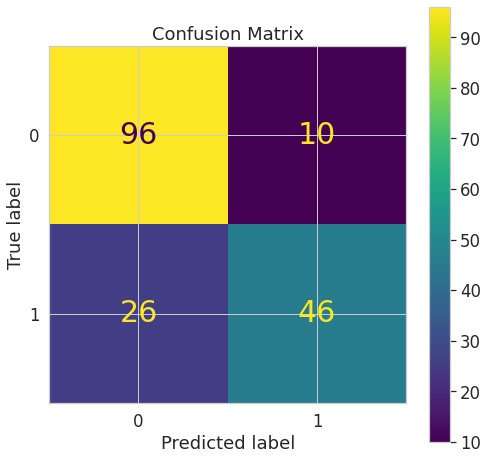

In [65]:
from sklearn.svm import NuSVC
NuSVC = NuSVC(kernel = 'rbf', random_state = 0)
NuSVC.fit(X_train,y_train)
y_pred_NuSVC = NuSVC.predict(X_test)

NuSVC_train = round(NuSVC.score(X_train, y_train) * 100, 2)
NuSVC_accuracy = round(accuracy_score(y_pred_NuSVC, y_test) * 100, 2)

print("Training Accuracy    :",NuSVC_train ,"%")
print("Model Accuracy Score :",NuSVC_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_NuSVC))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(NuSVC, X_test, y_test);
plt.title('Confusion Matrix');

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> HistGradientBoostingClassifier </h2>

Training Accuracy    : 99.58 %
Model Accuracy Score : 82.02 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       106
           1       0.82      0.71      0.76        72

    accuracy                           0.82       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.82      0.82      0.82       178

--------------------------------------------------------


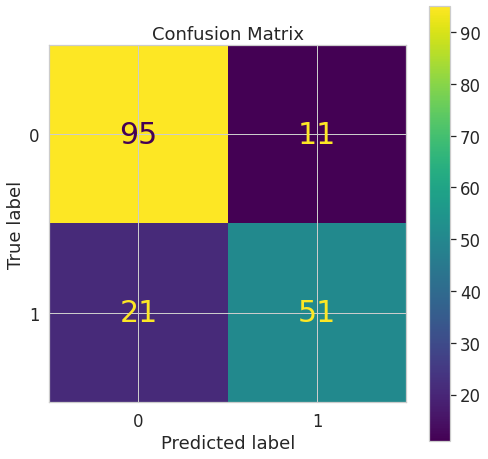

In [66]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgbm = HistGradientBoostingClassifier()
hgbm.fit(X_train,y_train)
y_pred_hgbm = hgbm.predict(X_test)


hgbm_train = round(hgbm.score(X_train, y_train) * 100, 2)
hgbm_accuracy = round(accuracy_score(y_pred_hgbm, y_test) * 100, 2)

print("Training Accuracy    :",hgbm_train ,"%")
print("Model Accuracy Score :",hgbm_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_hgbm))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(hgbm, X_test, y_test);
plt.title('Confusion Matrix');

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> GaussianProcessClassifier </h2>

Training Accuracy    : 83.01 %
Model Accuracy Score : 83.15 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.80      0.95      0.87       106
           1       0.90      0.65      0.76        72

    accuracy                           0.83       178
   macro avg       0.85      0.80      0.81       178
weighted avg       0.84      0.83      0.83       178

--------------------------------------------------------


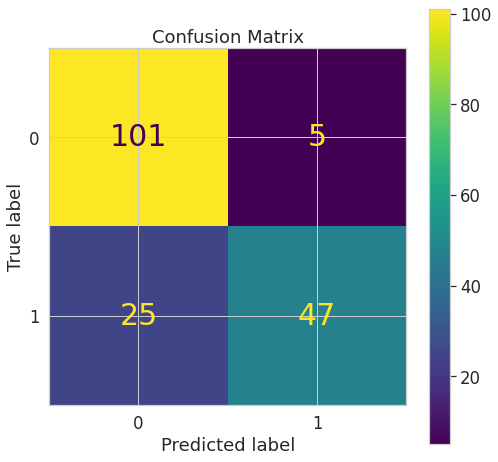

In [67]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
RBF = GaussianProcessClassifier(1.0 * RBF(1.0))
RBF.fit(X_train,y_train)
y_pred_RBF = RBF.predict(X_test)

RBF_train = round(RBF.score(X_train, y_train) * 100, 2)
RBF_accuracy = round(accuracy_score(y_pred_RBF, y_test) * 100, 2)

print("Training Accuracy    :",RBF_train ,"%")
print("Model Accuracy Score :",RBF_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_RBF))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(RBF, X_test, y_test);
plt.title('Confusion Matrix');

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> RidgeClassifier </h2>

Training Accuracy    : 83.01 %
Model Accuracy Score : 80.9 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       106
           1       0.82      0.68      0.74        72

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178

--------------------------------------------------------


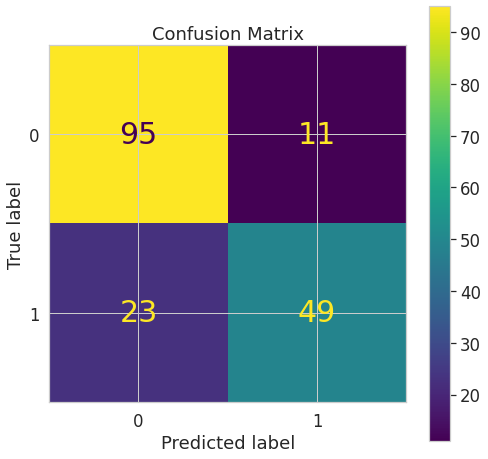

In [68]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Ridge = RidgeClassifier()
Ridge.fit(X_train,y_train)
y_pred_Ridge = Ridge.predict(X_test)

Ridge_train = round(RBF.score(X_train, y_train) * 100, 2)
Ridge_accuracy = round(accuracy_score(y_pred_Ridge, y_test) * 100, 2)

print("Training Accuracy    :",Ridge_train ,"%")
print("Model Accuracy Score :",Ridge_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_Ridge))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(Ridge, X_test, y_test);
plt.title('Confusion Matrix');

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> CalibratedClassifierCV </h2>

Training Accuracy    : 79.78 %
Model Accuracy Score : 80.9 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       106
           1       0.82      0.68      0.74        72

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178

--------------------------------------------------------


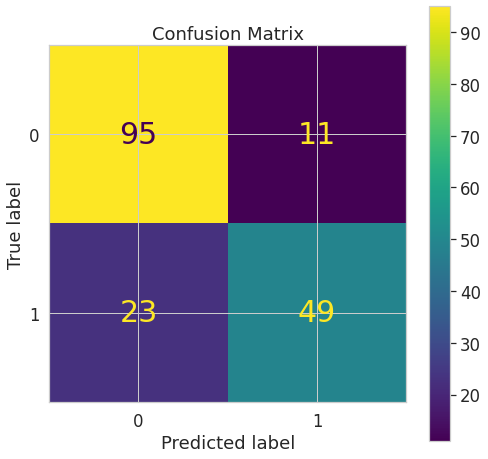

In [69]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Calib = CalibratedClassifierCV()
Calib.fit(X_train,y_train)
y_pred_Calib = Calib.predict(X_test)

Calib_train = round(Calib.score(X_train, y_train) * 100, 2)
Calib_accuracy = round(accuracy_score(y_pred_Calib, y_test) * 100, 2)

print("Training Accuracy    :",Calib_train ,"%")
print("Model Accuracy Score :",Calib_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_Calib))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(Calib, X_test, y_test);
plt.title('Confusion Matrix');

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:OliveDrab"> PassiveAggressiveClassifier </h2>

Training Accuracy    : 79.49 %
Model Accuracy Score : 80.34 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       106
           1       0.80      0.68      0.74        72

    accuracy                           0.80       178
   macro avg       0.80      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178

--------------------------------------------------------


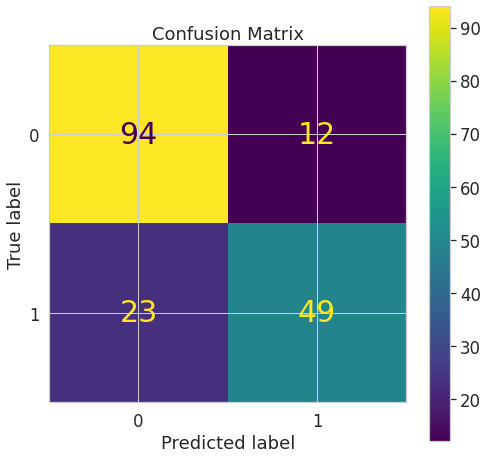

In [70]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Passive = PassiveAggressiveClassifier(C = 0.5, random_state = 5)
Passive.fit(X_train,y_train)
y_pred_Passive = Passive.predict(X_test)

Passive_train = round(Passive.score(X_train, y_train) * 100, 2)
Passive_accuracy = round(accuracy_score(y_pred_Passive, y_test) * 100, 2)

print("Training Accuracy    :",Passive_train ,"%")
print("Model Accuracy Score :",Passive_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_Passive))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(Passive, X_test, y_test);
plt.title('Confusion Matrix');

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> Comparing Different Models</h1>

In [71]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'KNN', 'Logistic Regression',
        'Random Forest',  'Perceptron',
        'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree',
        'GaussianNB', 'MLPClassifier', 'XGBClassifier','ExtraTreesClassifier',
        'AdaBoostClassifier', 'lgb', 'NuSVC', 'HistGradientBoostingClassifier',
        'GaussianProcessClassifier','RidgeClassifier','CalibratedClassifierCV',
        'PassiveAggressiveClassifier'
    ],
    'Training Accuracy': [
        log_train, svc_train, knn_train, gaussian_train, perceptron_train,
        linear_svc_train, sgd_train, decision_train, random_forest_train,
        mlp_train, xgb_train, et_train, ada_train, lgb_train, NuSVC_train,
        hgbm_train,RBF_train,Ridge_train, Calib_train, Passive_train
    ],
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, knn_accuracy, gaussian_accuracy, perceptron_accuracy,
        linear_svc_accuracy, sgd_accuracy, decision_accuracy, random_forest_accuracy,
        mlp_accuracy, xgb_accuracy, et_accuracy, ada_accuracy, lgb_accuracy, NuSVC_accuracy,
        hgbm_accuracy, RBF_accuracy,Ridge_accuracy, Calib_accuracy, Passive_accuracy
    ]
})

In [72]:
pd.set_option('precision',2)

models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,Training Accuracy,Model Accuracy Score
GaussianProcessClassifier,83.01,83.15
Random Forest,78.51,82.02
HistGradientBoostingClassifier,99.58,82.02
MLPClassifier,83.15,82.02
GaussianNB,100.00,81.46
Support Vector Machines,80.06,80.90
AdaBoostClassifier,84.69,80.90
CalibratedClassifierCV,79.78,80.90
RidgeClassifier,83.01,80.90
Stochastic Gradient Decent,80.06,80.90


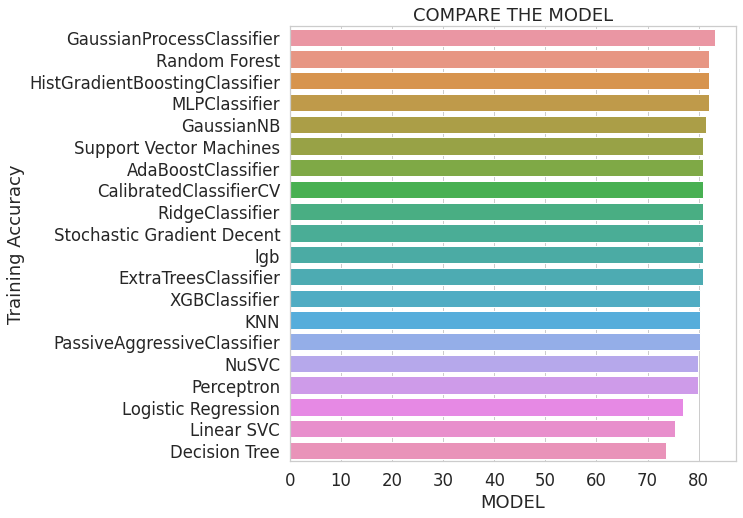

In [73]:
models=models.sort_values(by='Model Accuracy Score',ascending=False)[:20]

sns.barplot(y= 'Model', x= 'Model Accuracy Score', data= models)
plt.title('COMPARE THE MODEL')
plt.xlabel('MODEL')
plt.ylabel('Training Accuracy');

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> Result prediction:</h1>

In [74]:
prediction = RBF.predict(X_test)
print(prediction)

[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0
 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0]


In [75]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.sample(10).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
194,1,1
232,0,0
76,0,0
65,1,0
725,0,0
215,1,1
699,0,0
216,1,0
668,0,0
195,1,1


In [76]:
from sklearn.ensemble import RandomForestClassifier

y = titanic["Survived"]

features = ["Pclass", "SibSp", "Parch"]
X = pd.get_dummies(titanic[features])
X_test = pd.get_dummies(titanic[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)


output = pd.DataFrame({'PassengerId': titanic.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
